In [9]:
%matplotlib inline
import pyNN.nest as p
from pyNN.random import NumpyRNG, RandomDistribution
from pyNN.utility import Timer
import matplotlib.pyplot as plt
import pylab
import numpy as np

timer = Timer()
p.setup(timestep=0.1) # 0.1ms 

0

In [10]:
pop_1 = p.Population(1,p.IF_curr_exp, {}, label="pop_1")
input = p.Population(1, p.SpikeSourceArray, {'spike_times': [[0,3,6]]}, label='input')
stat_syn = p.StaticSynapse(weight =50.0, delay=1)
input_proj = p.Projection(input, pop_1, p.OneToOneConnector(),synapse_type=stat_syn, receptor_type='excitatory')

In [11]:
pop_1.record(['v','spikes'])
p.run(10)
pop_1_data= pop_1.get_data()

In [12]:
fig_settings = {
    'lines.linewidth': 0.5,
    'axes.linewidth': 0.5,
    'axes.labelsize': 'small',
    'legend.fontsize': 'small',
    'font.size': 8
}
plt.rcParams.update(fig_settings)
plt.figure(1, figsize=(6,8))

In [13]:
def plot_spiketrains(segment):
    for spiketrain in segment.spiketrains:
        y = np.ones_like(spiketrain) * spiketrain.annotations['source_id']
        plt.plot(spiketrain, y, '.')
        plt.ylabel(segment.name)
        plt.setp(plt.gca().get_xticklabels(), visible=False)

In [14]:
def plot_signal(signal, index, colour='b'):
    label = "Neuron %d" % signal.annotations['source_ids'][index]
    plt.plot(signal.times, signal[:, index], colour, label=label)
    plt.ylabel("%s (%s)" % (signal.name, signal.units._dimensionality.string))
    plt.setp(plt.gca().get_xticklabels(), visible=False)
    plt.legend()

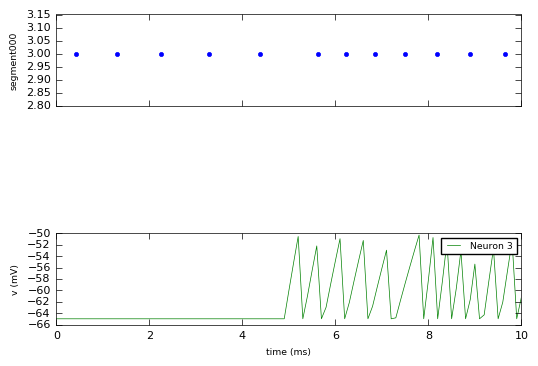

In [15]:
n_panels = sum(a.shape[1] for a in pop_1_data.segments[0].analogsignalarrays) + 2
plt.subplot(n_panels, 1, 1)
plot_spiketrains(pop_1_data.segments[0])
panel = 3
for array in pop_1_data.segments[0].analogsignalarrays:
    for i in range(array.shape[1]):
        plt.subplot(n_panels, 1, panel)
        plot_signal(array, i, colour='bg'[panel%2])
        panel += 1
plt.xlabel("time (%s)" % array.times.units._dimensionality.string)
plt.setp(plt.gca().get_xticklabels(), visible=True)

plt.savefig("neo_example.png")

In [8]:
plt.get_backend()

'module://ipykernel.pylab.backend_inline'